In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
from datetime import datetime
format = '%Y-%m-%d %H:%M:%S'
#datetime.strptime(data0['Date'][0], format)
import matplotlib.cm as cm
dir_path = os.getcwd()

In [3]:
filenames = os.listdir(os.path.join(dir_path,'User_Value','M'))
userinfo_path = os.path.join(dir_path,'LVAMI_UserInfo_M.csv')
userinfo = pd.read_csv(userinfo_path)
userinfo.head()

,CustomerID,位置,契約別,用電別
0,M00001,30071,1,5
1,M00002,30071,1,5
2,M00003,30071,1,5
3,M00004,30071,1,5
4,M00005,30071,1,5


In [22]:
data = pd.read_csv(os.path.join(dir_path,'User_Value',filenames[0]))
dates_list = [datetime.strptime(date, format) for date in data['Date']]
data['datetime'] = pd.Series(dates_list, index=data.index)
data.head()

,CustomerID,Date,Value,datetime
0,M00001,2016-01-03 00:00:00,0.025,2016-01-03 00:00:00
1,M00001,2016-01-03 00:15:00,0.040,2016-01-03 00:15:00
2,M00001,2016-01-03 00:30:00,0.029,2016-01-03 00:30:00
3,M00001,2016-01-03 00:45:00,0.035,2016-01-03 00:45:00
4,M00001,2016-01-03 01:00:00,0.037,2016-01-03 01:00:00


In [15]:
directory = os.path.join(dir_path,'scatterplot')
print(directory)
def plot(filename):
    data = pd.read_csv(os.path.join(dir_path,'User_Value',filename))
    dates_list = [datetime.strptime(date, format) for date in data['Date']]
    data['datetime'] = pd.Series(dates_list, index=data.index)
    plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.scatter(np.array(data['datetime']),data['Value'],marker='.')
    plt.title(filename.strip(".csv"))
    plt.xlabel('time')
    #plt.ylim
    plt.ylabel('kWh')
    if not os.path.exists(directory):
        os.makedirs(directory)
    plt.savefig(os.path.join(directory,filename.strip(".csv"))+'.png', dpi=100)

/Users/Wan-Ting/Google Drive/智慧電表/scatterplot


In [27]:
year_list = [date.year for date in data['datetime']]
data['year'] = pd.Series(year_list, index=data.index)
month_list = [date.month for date in data['datetime']]
data['month'] = pd.Series(month_list, index=data.index)
day_list = [date.day for date in data['datetime']]
data['day'] = pd.Series(day_list, index=data.index)
time_list = [date.time() for date in data['datetime']]
data['time'] = pd.Series(time_list, index=data.index)

data.head()

,CustomerID,Date,Value,datetime,year,month,day,time
0,M00001,2016-01-03 00:00:00,0.025,2016-01-03 00:00:00,2016,1,3,00:00:00
1,M00001,2016-01-03 00:15:00,0.040,2016-01-03 00:15:00,2016,1,3,00:15:00
2,M00001,2016-01-03 00:30:00,0.029,2016-01-03 00:30:00,2016,1,3,00:30:00
3,M00001,2016-01-03 00:45:00,0.035,2016-01-03 00:45:00,2016,1,3,00:45:00
4,M00001,2016-01-03 01:00:00,0.037,2016-01-03 01:00:00,2016,1,3,01:00:00


In [33]:
year16 = data.loc[data['year']==2016,:]
jan = year16.loc[year16['month']==1,:]
janfirst = jan.loc[jan['day']==3,:]

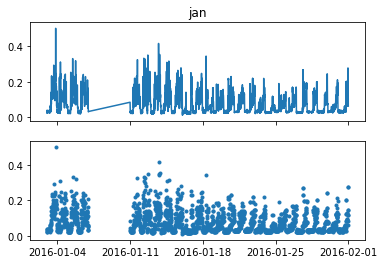

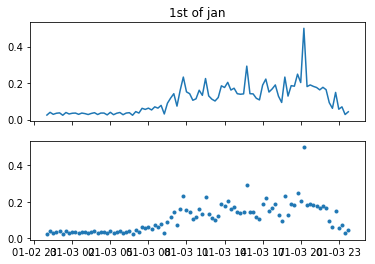

In [34]:
def plot(data,title):
    plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.scatter(np.array(data['datetime']),data['Value'],marker='.')
    plt.xlim(np.array(data['datetime'])[0],np.array(data['datetime'])[-1])
    plt.xlabel('time')
    plt.title(title)
    plt.ylabel('kWh')


def subplot(data,title):
    f, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=True)
    ax1.plot(np.array(data['datetime']),data['Value'])
    ax1.set_title(title)
    ax2.scatter(np.array(data['datetime']),data['Value'],marker='.')
    

subplot(jan,"jan")
subplot(janfirst,"1st of jan")

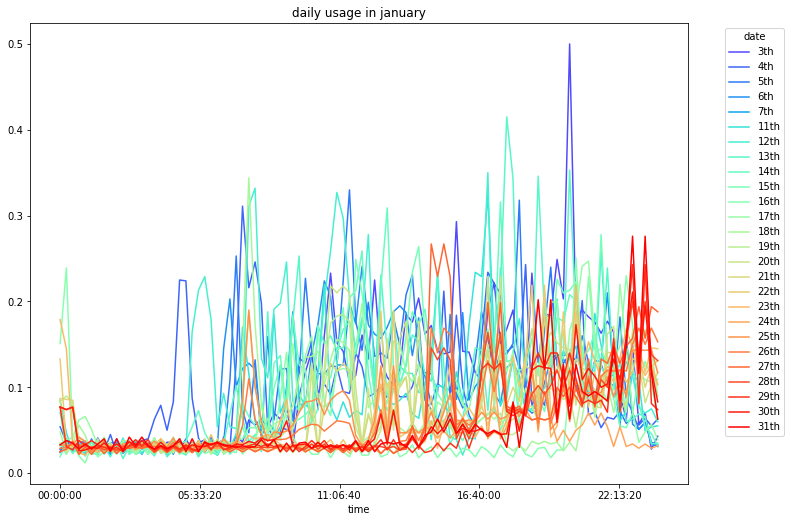

In [79]:
# day
colors = cm.rainbow(np.linspace(0, 1, 31+1))
lineplot=[]
plt.figure(figsize=(12,8))
for i in np.unique(jan['day']):
    day = jan.loc[jan['day']==i,:]
    lineplot.append(plt.plot(np.array(day['time']),day['Value'], c = colors[i],label=str(i)+'th'))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, ncol=1,title='date')
plt.title('daily usage in january')
plt.tight_layout()
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
plt.savefig(os.path.join(directory, 'daily usage in january'),dpi=100)
plt.show()   


In [149]:
colors = cm.rainbow(np.linspace(0, 1, 31+1))
directory = os.path.join(dir_path,'all_month')
print(directory)
def plot_month(data):
    lineplot=[]
    plt.figure(figsize=(12,8))
    for i in np.unique(data['day']):
        day = data.loc[data['day']==i,:]
        lineplot.append(plt.plot(np.array(day['time']),day['Value'], c = colors[i],label=str(i)+'th'))
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, ncol=1,title='date')
    plt.title('daily usage in ' + day['datetime'].tolist()[0].strftime("%B")+' 2016')
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
    if not os.path.exists(directory):
        os.makedirs(directory)
    plt.savefig(os.path.join(directory, 'daily usage in '+day['datetime'].tolist()[0].strftime("%B")+' 2016'),dpi=100)

/Users/Wan-Ting/Google Drive/智慧電表/all_month


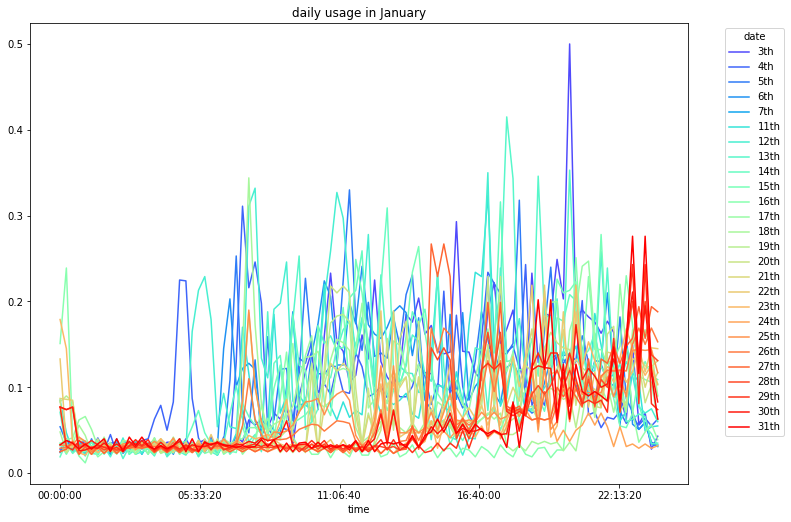

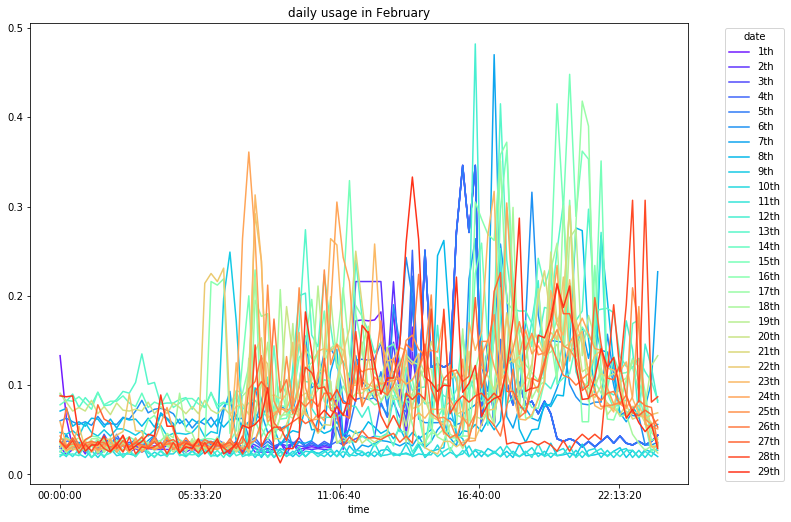

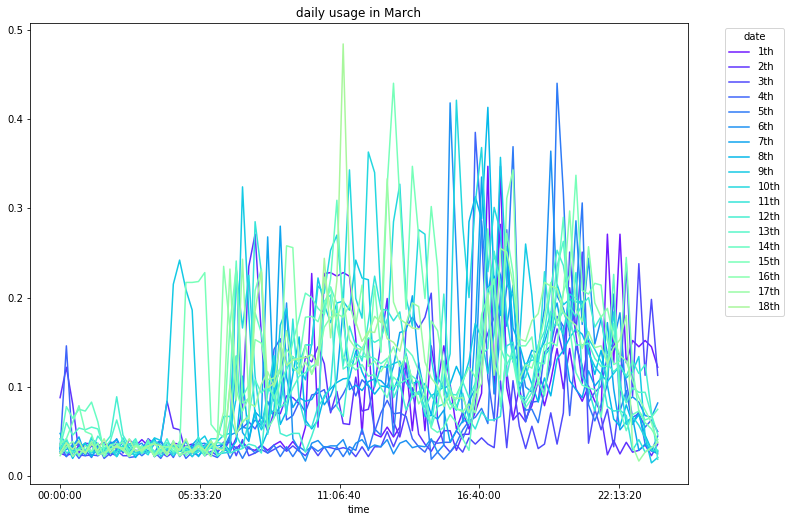

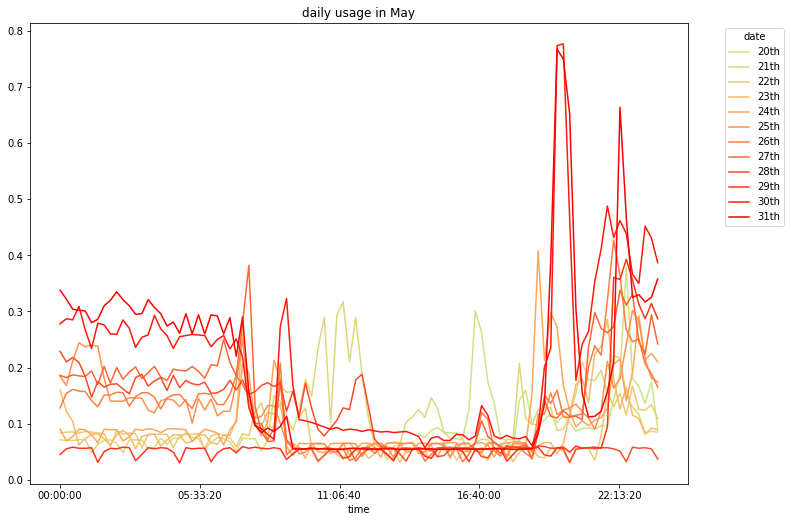

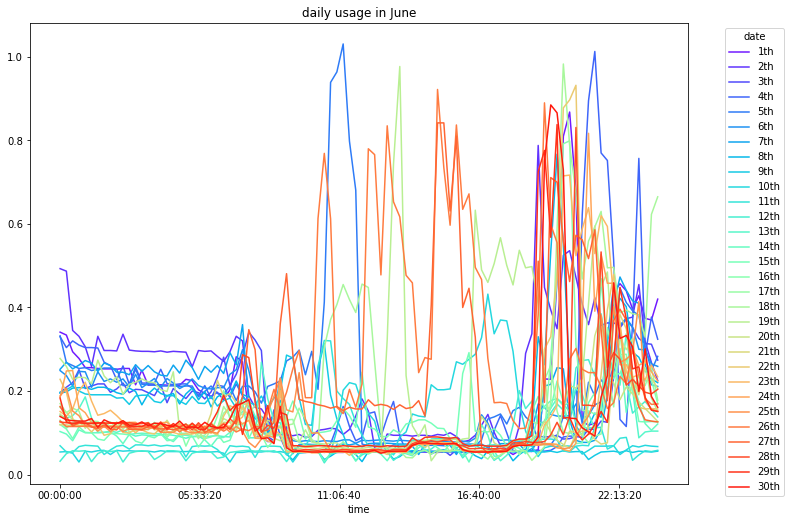

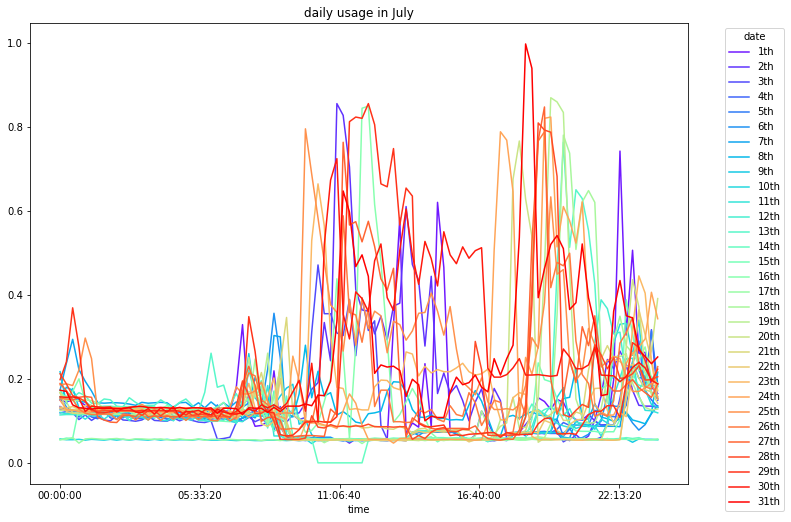

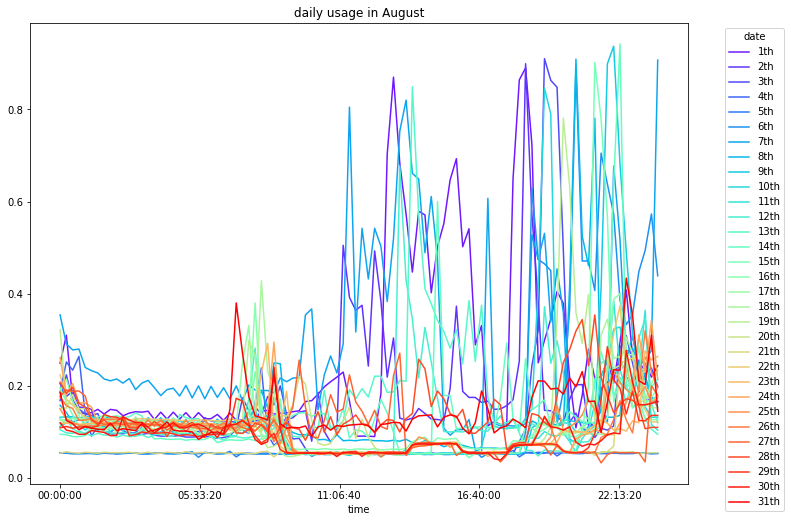

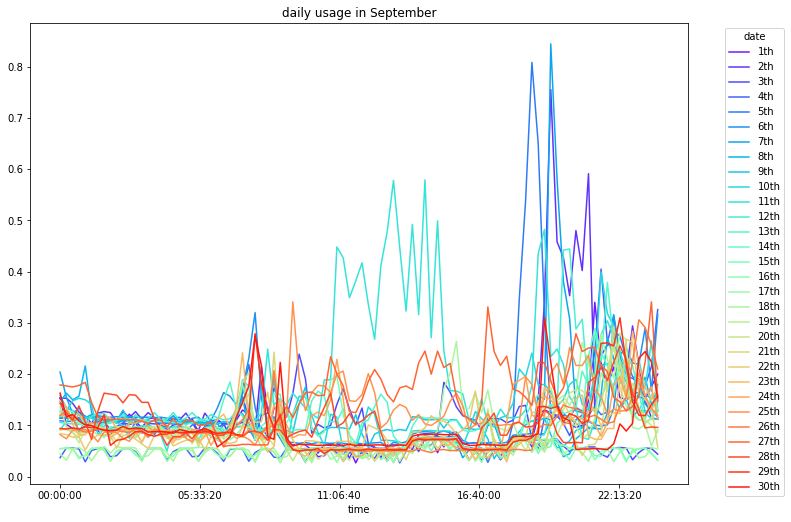

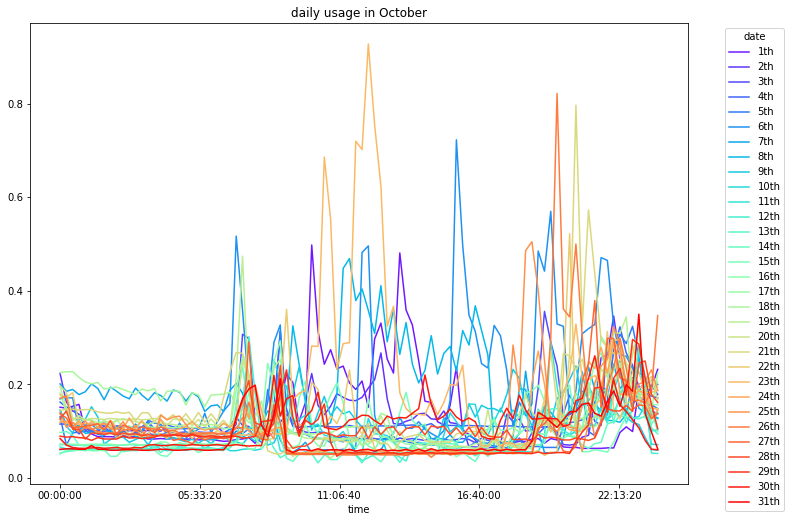

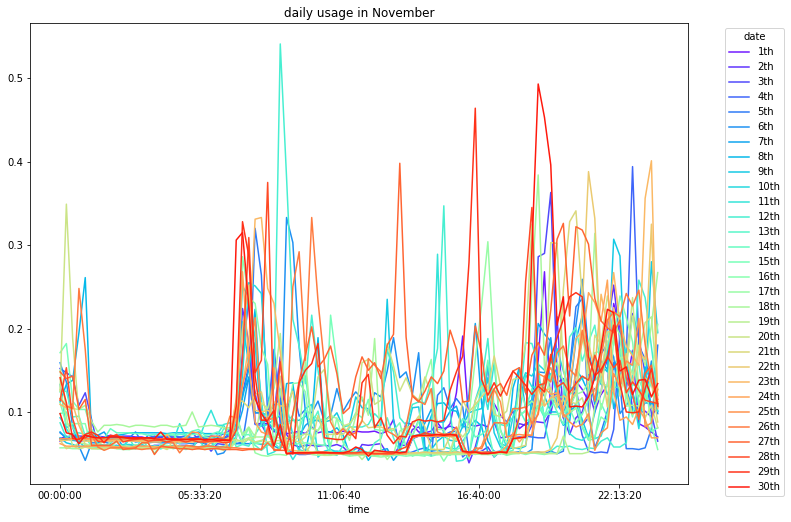

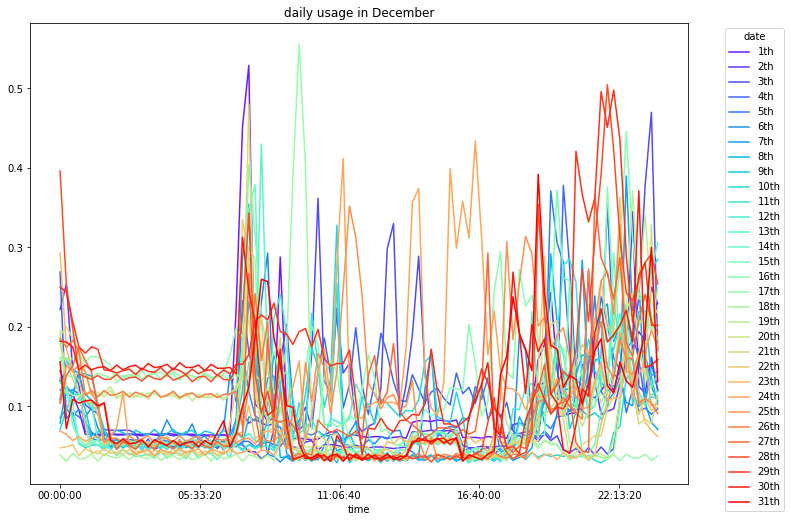

In [150]:
year16 = data.loc[data['year']==2016,:]

for m in np.unique(data['month']):
    month = year16.loc[year16['month']==m,:]
    plot_month(month)